In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
import sys
sys.path.append('..')

In [3]:
from tasks import *

input_dim=10
output_dim=10

sess = tf.InteractiveSession()

cell = NTMCell(input_dim=input_dim, output_dim=output_dim)
ntm = NTM(cell, sess, 1, 100, forward_only=True)

ntm.load('../checkpoint')

 [*] Building a NTM model
Percent: [####################] 100% Finished.
 [*] Build a NTM model finished
 [*] Reading checkpoints...


In [4]:
copy(ntm, 5, sess)

 true output : 
  ##### ##
  # # # ##
  ###     
      # ##
  #   ## #
 predicted output :
  ##### ##
  # # # ##
  ###     
      # ##
  #   ## #
 Loss : 0.000001


In [20]:
def plot(ntm, seq_length, sess):
    seq, outputs, loss = copy(ntm, seq_length, sess, print_=False)
    
    shape = list(np.array(outputs).shape)
    shape[0] += 2
    z1 = np.zeros_like(outputs)
    z2 = np.zeros(shape)
    
    s1 = np.zeros_like(seq[0]); s1[0]=1
    s2 = np.zeros_like(seq[0]); s2[1]=1
    
    seq = [s1] + seq + [s2]
    
    seq = np.r_[np.array(seq), z1]
    outputs = np.r_[z2, outputs]
    
    if seq_length >= 50:
        plt.figure(1,figsize=(20,4))
    else:
        plt.figure(1,figsize=(20,7))
    plt.subplot(211)
    plt.imshow(seq.T, interpolation='nearest')
    plt.subplot(212)
    plt.imshow(outputs.T, interpolation='nearest')
    print("Loss : %f" % loss)

Loss : 0.000001


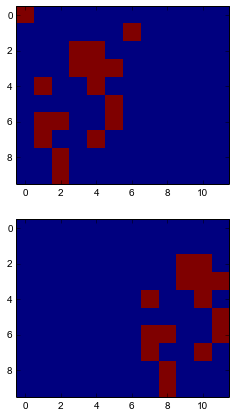

In [6]:
plot(ntm, 5, sess)

Loss : 0.000003


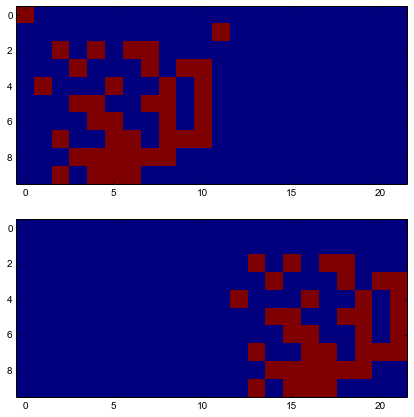

In [7]:
plot(ntm, 10, sess)

Loss : 0.000010


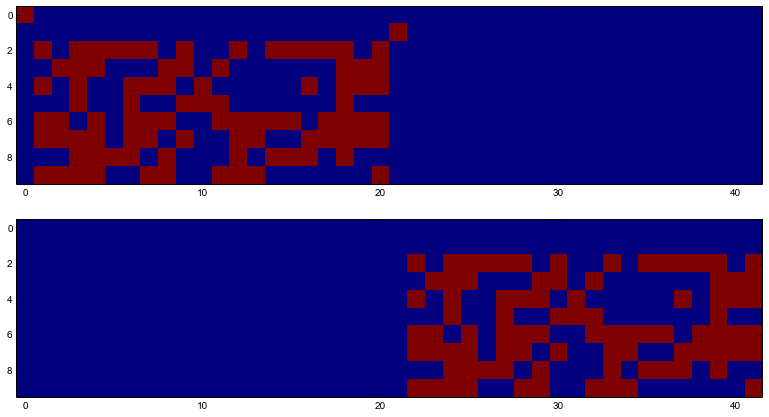

In [8]:
plot(ntm, 20, sess)

Loss : 0.000075


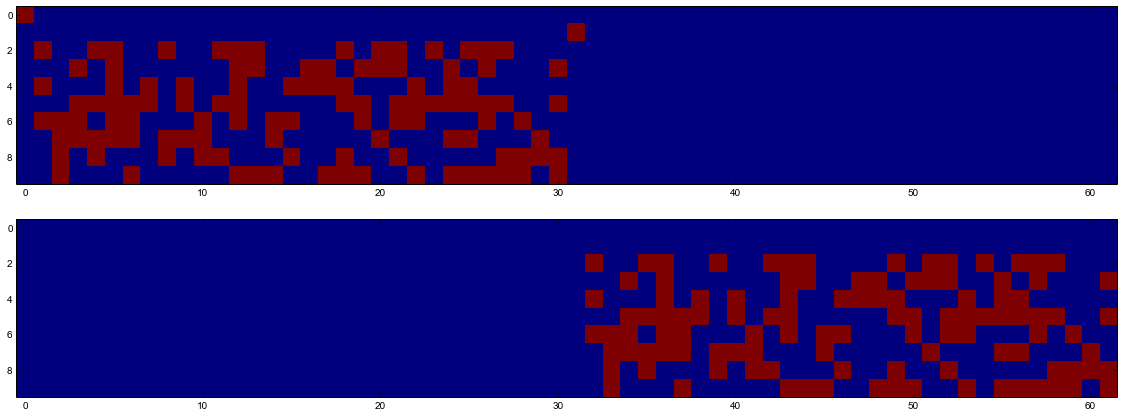

In [9]:
plot(ntm, 30, sess)

Loss : 0.012065


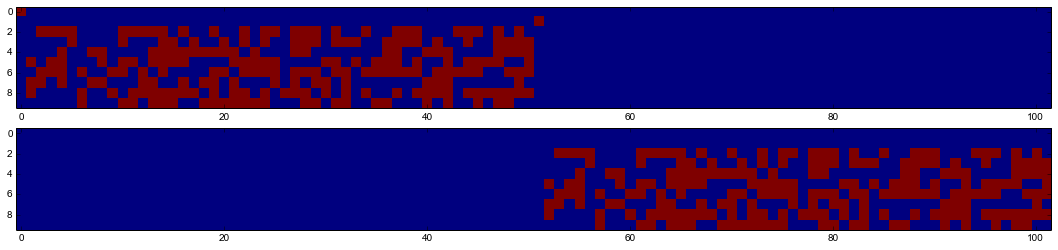

In [22]:
plot(ntm, 50, sess)

Loss : 7.548618


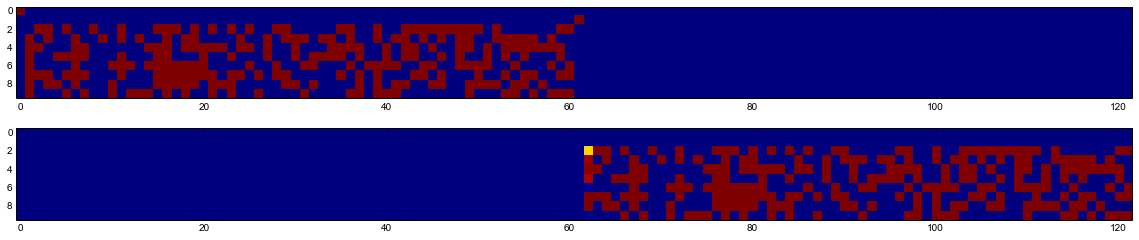

In [16]:
plot(ntm, 60, sess)

Loss : 737.201660


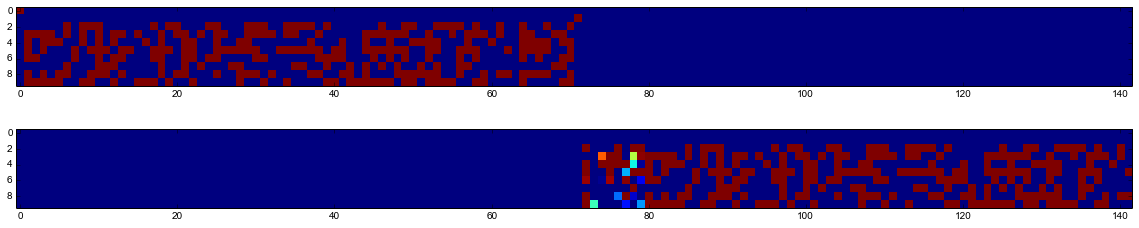

In [17]:
plot(ntm, 70, sess)

Loss : 823.394470


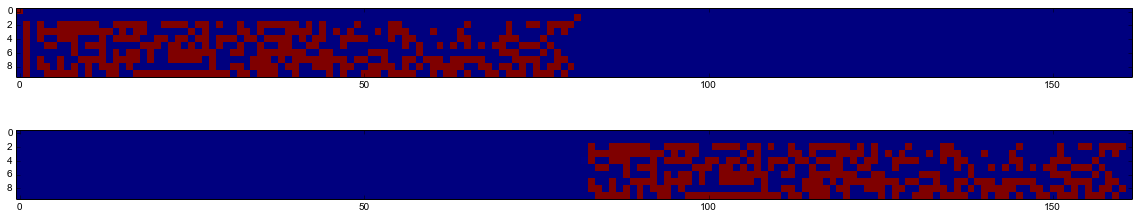

In [18]:
plot(ntm, 80, sess)

Loss : 1115.814453


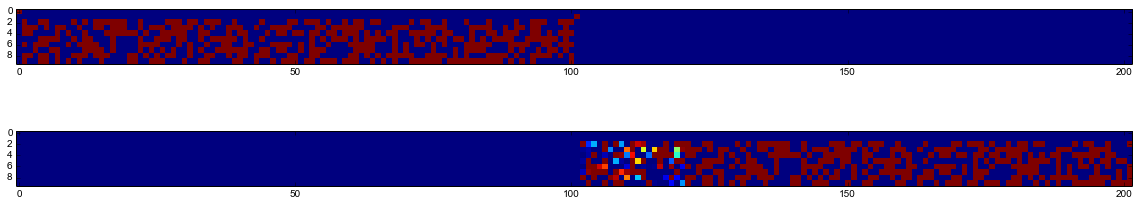

In [19]:
plot(ntm, 100, sess)